In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data=pd.read_csv("C:\\Users\\channu\\Downloads\\glass.csv")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<AxesSubplot:>

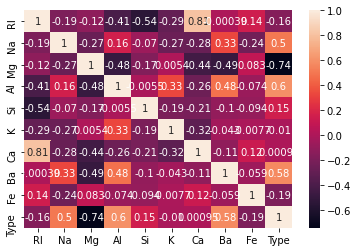

In [7]:
sns.heatmap(data.corr(),annot=True)

In [8]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,0:9]
y = data.iloc[:,9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [15]:
clf=DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
y_pred_DecisionTreeClassifier=clf.predict(X_test)

In [18]:
scores = []
score = accuracy_score(y_pred_DecisionTreeClassifier,y_test)
a=scores.append(score)

In [20]:
from sklearn.model_selection import cross_val_score
score_tree=cross_val_score(clf, X,y, cv=10)
score_tree

C:\Users\channu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.59090909, 0.59090909, 0.63636364, 0.63636364, 0.61904762,
       0.80952381, 0.71428571, 0.19047619, 0.71428571, 0.47619048])

In [21]:
cv_scores = []
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))
cv_score = score_tree.mean()
cv_scores.append(cv_score)

Decision Tree Accuracy: 0.60 (+/- 0.32)


# random forest classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
clf=RandomForestClassifier(random_state=0,n_estimators=25,n_jobs=2)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=0)

In [25]:
y_pred_RandomForestClassifier=clf.predict(X_test)

In [27]:
score=accuracy_score(y_pred_RandomForestClassifier,y_test)
scores.append(score)

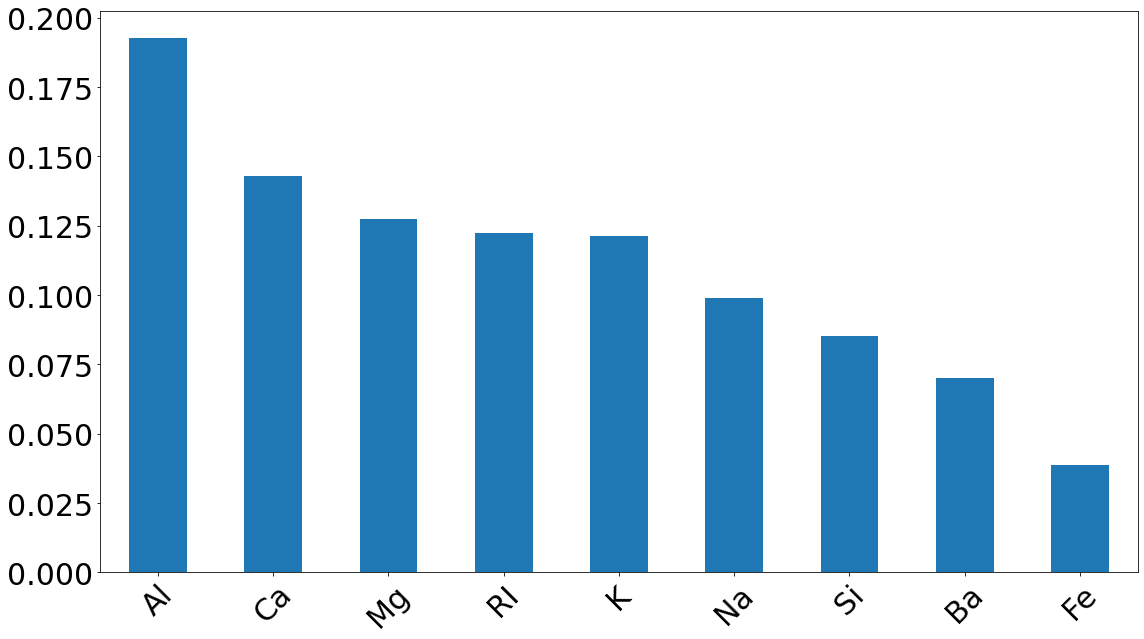

In [28]:
global importances
# Get the feature importances
importances = []
importances = clf.feature_importances_


# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()


In [29]:
score_forest=cross_val_score(clf, X,y, cv=10)
score_forest
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (score_forest.mean(), score_forest.std() * 2))
cv_score = score_forest.mean()
cv_scores.append(cv_score)

C:\Users\channu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Random Forest Accuracy: 0.72 (+/- 0.22)


# perceptron

In [30]:
from sklearn.linear_model import Perceptron

In [32]:
clf=Perceptron(tol=1e-3, eta0=0.1, random_state=0)
clf.fit(X_train,y_train)

Perceptron(eta0=0.1)

In [33]:
y_pred_Perceptron=clf.predict(X_test)

In [34]:
score=accuracy_score(y_pred_Perceptron,y_test)
scores.append(score)

In [35]:
score_Perceptron=cross_val_score(clf,X,y,cv=10)
score_Perceptron

C:\Users\channu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.04545455, 0.40909091, 0.45454545, 0.45454545, 0.04761905,
       0.19047619, 0.14285714, 0.47619048, 0.0952381 , 0.23809524])

In [37]:
print("Perceptron Accuracy: %0.2f (+/- %0.2f)" % (score_Perceptron.mean(), score_Perceptron.std() * 2))
cv_score = score_Perceptron.mean()
cv_scores.append(cv_score)

Perceptron Accuracy: 0.26 (+/- 0.34)


# SUPPORT VECTOR MACHINE

In [41]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

In [42]:
svm = SVC(kernel='linear', C=0.2, random_state=0)

In [43]:
svm.fit(X_train,y_train)

SVC(C=0.2, kernel='linear', random_state=0)

In [44]:
y_pred_svm=svm.predict(X_test)

In [45]:
score=accuracy_score(y_pred_svm,y_test)
scores.append(score)

In [46]:
score_svm=cross_val_score(svm, X,y, cv=10)
print("Support Vector Machine Accuracy: %0.2f (+/- %0.2f)" % (score_svm.mean(), score_svm.std() * 2))
cv_score = score_svm.mean()
cv_scores.append(cv_score)

Support Vector Machine Accuracy: 0.57 (+/- 0.24)


C:\Users\channu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


# k-nearest neighbour

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
clf=KNeighborsClassifier(n_neighbors=5)

In [49]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred_KNeighborsClassifier=clf.predict(X_test)

In [51]:
score=accuracy_score(y_pred_KNeighborsClassifier,y_test)

In [52]:
scores.append(score)

In [53]:
score_knn=cross_val_score(clf,X,y,cv=10)

C:\Users\channu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [54]:
cv_score = score_knn.mean()
cv_scores.append(cv_score)

In [55]:
print(" K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))

 K-Nearest Neighbors Accuracy: 0.65 (+/- 0.27)


In [60]:
from matplotlib.colors import ListedColormap

# accuracy score

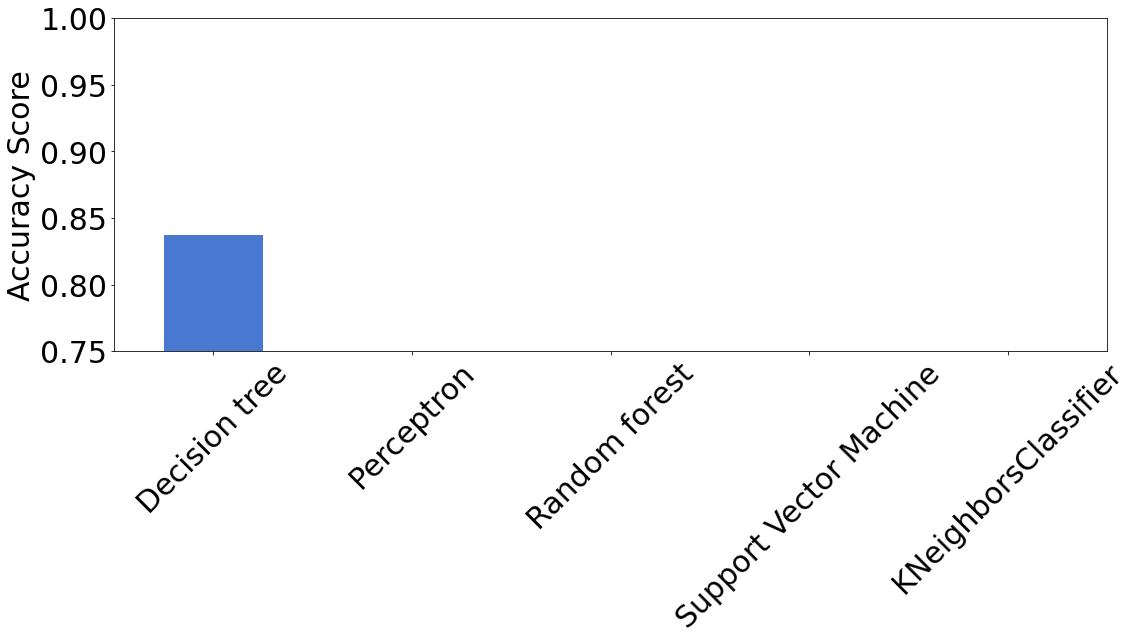

In [61]:
Acc_scores = pd.Series(scores, ['Decision tree','Perceptron', 'Random forest','Support Vector Machine',
                                  'KNeighborsClassifier'])

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
Acc_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()

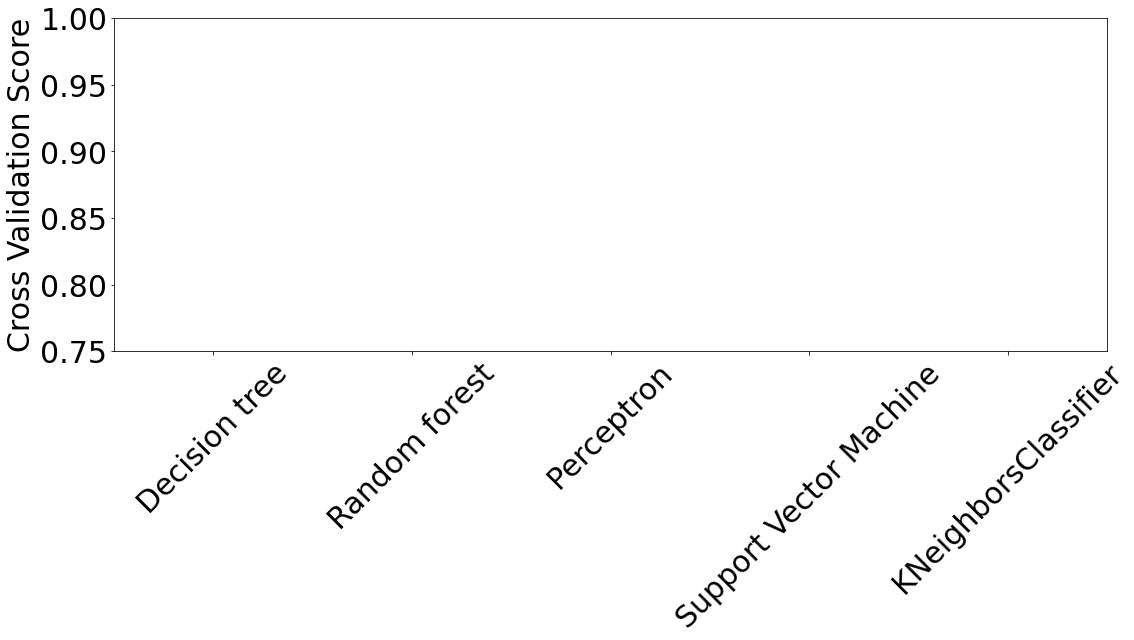

In [62]:
# Convert the Cross Validation scores into one-dimensional 1darray with corresponding classifier names as axis labels

clf_scores = pd.Series(cv_scores, ['Decision tree', 'Random forest','Perceptron','Support Vector Machine',
                                  'KNeighborsClassifier'])

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
#colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
clf_scores.plot(x='Classifiers', y='Cross Validation scores',kind = 'bar',figsize=(16,9), 
                rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Cross Validation Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()

# conclusion:- As i got K-Nearest Neighbors Accuracy:0.27 accuracy score and 0.65 of cross validation.
